In [1]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import wordcloud
import re

df=pd.read_excel('./서울시품목별재활용(2015년).xls')

In [2]:
df

,기간,구분,합계,종이류,고철류,유리병,캔류,플라스틱,스티로폼,의류,비닐봉투류,기타
0,2015,합계,203971,19255,4189,37819,6082,24469,3683,956,59189,48329
1,2015,종로구,10646,38,63,1057,354,1039,175,3,19,7898
2,2015,중구,3538,557,53,1458,373,463,122,-,32,480
3,2015,용산구,5420,1243,24,2014,267,1121,159,11,491,90
4,2015,성동구,4203,382,63,1057,355,1023,63,33,1227,-
5,2015,광진구,14179,537,278,2204,268,2072,136,104,3092,5488
6,2015,동대문구,7761,385,129,2589,188,794,168,-,3508,-
7,2015,중랑구,3226,428,95,123,150,848,152,4,-,1426
8,2015,성북구,12268,232,-,662,160,714,150,267,2700,7383
9,2015,강북구,7855,640,240,1690,65,1340,251,14,3470,145


In [7]:
df1=pd.read_excel('./2020년 재활용선별장 운영현황.xls')

In [11]:
df1

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,자치구별 재활용 선별현황(2020년),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,연번,자치구,시설개요,NaN,운영업체명,수집 \n반입량\n(t),공동이용시\n구청별 \n비율(%),선별량(t),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,잔재물\n,NaN,NaN,선별률(%)
2,NaN,NaN,시설명,시설\n용량\n(톤/일),NaN,NaN,NaN,계,종이류,필름류(EPR),...,유리병 선별량,NaN,NaN,NaN,스티로폼,기타,발생량\n(t),처리단가\n(원/톤),잔재비율(%),NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,계,보증금 병,잡병,혼합,NaN,NaN,NaN,NaN,NaN,NaN
4,1,종로구,"성동구 공동이용, 장원리싸이클, 크린자원산업",NaN,NaN,9681,0,4858.4,529.142166,2098.100778,...,734.403742,22.369645,430.394097,281.64,54.829039,81.137029,4823.050013,NaN,0.498198,0.501849
5,2,중구,중구 자원재활용처리장,40,명민산업㈜,9900,NaN,5995.3,2489.57,1025.99,...,707.76,86.47,313.53,307.76,127.0,226.66,3904.62,NaN,0.394406,0.605586
6,3,용산구,용산구 재활용선별장,47,청목자원,18767,NaN,8932.9,3398.3,1670.6,...,1181.8,1107.1,74.7,0,197.1,343.4,9833.7,NaN,0.523989,0.47599
7,4,성동구,성동구 자원회수센터,70,성동구도시관리공단,17403,0,9889.2,1565.37,4691.35,...,1251.7,97.22,1.65,1152.83,159.67,68.12,7513.84,NaN,0.431755,0.568247
8,5,광진구,강동구 공동이용,NaN,NaN,18221,0,12048.5,1846.95,5942.96,...,1448.91,258.32,222.85,967.74,227.63,98.262,6172.77,NaN,0.338772,0.661243
9,6,동대문구,동대문구 재활용품 선별시설,20,㈜JS자원,15550,NaN,13189.4,1618.5,4327.3,...,2840.71,65.51,2775.2,0,421.97,1451.33,2360.14,NaN,0.151777,0.848193


In [12]:
a=df1['Unnamed: 26']
b=df1['Unnamed: 1']

In [16]:
data=pd.concat([b,a],axis=1)

In [17]:
data

,Unnamed: 1,Unnamed: 26
0,NaN,NaN
1,자치구,선별률(%)
2,NaN,NaN
3,NaN,NaN
4,종로구,0.501849
5,중구,0.605586
6,용산구,0.47599
7,성동구,0.568247
8,광진구,0.661243
9,동대문구,0.848193


In [27]:
data=data.drop([0,1,2,3])

In [29]:
data

,Unnamed: 1,Unnamed: 26
4,종로구,0.501849
5,중구,0.605586
6,용산구,0.47599
7,성동구,0.568247
8,광진구,0.661243
9,동대문구,0.848193
10,중랑구,0.7596
11,성북구,0.475626
12,강북구,0.446666
13,도봉구,0.282621


In [30]:
import numpy as np

In [35]:
data.columns=["자치구","선별율"]

In [36]:
data

,자치구,선별율
4,종로구,0.501849
5,중구,0.605586
6,용산구,0.47599
7,성동구,0.568247
8,광진구,0.661243
9,동대문구,0.848193
10,중랑구,0.7596
11,성북구,0.475626
12,강북구,0.446666
13,도봉구,0.282621


In [47]:
data=data.astype({'선별율':'float'})

In [54]:
data.선별율=data.선별율.round(2)

In [55]:
data

,자치구,선별율
4,종로구,0.50
5,중구,0.61
6,용산구,0.48
7,성동구,0.57
8,광진구,0.66
9,동대문구,0.85
10,중랑구,0.76
11,성북구,0.48
12,강북구,0.45
13,도봉구,0.28


In [58]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import wordcloud
import re
import seaborn as sns

font_path = "data/THEdog.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


Figure(2160x1440)
AxesSubplot(0.125,0.125;0.775x0.755)


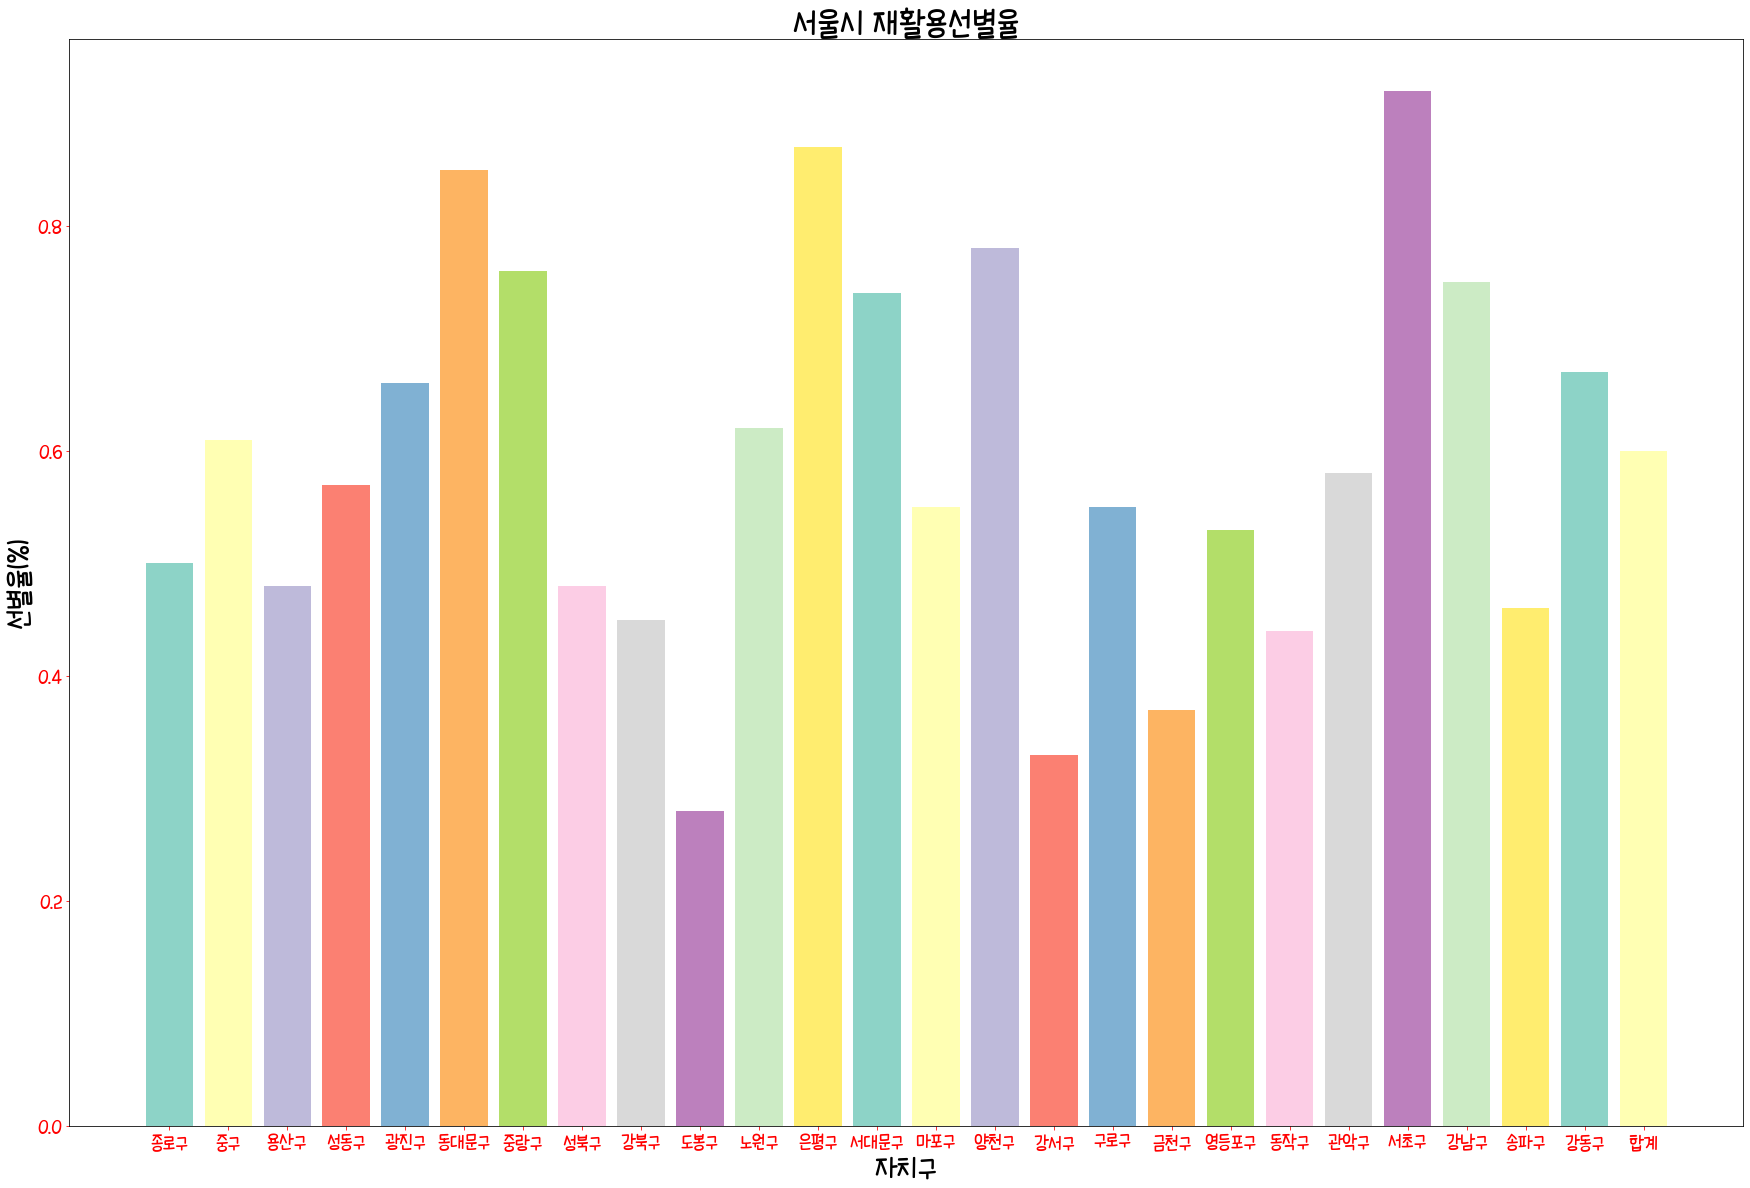

In [61]:
plt.figure(figsize=(30,20))
print(plt.gcf())
s = data

plt.title("서울시 재활용선별율",size=35)
plt.xlabel('자치구',size=30)
plt.ylabel('선별율(%)',size=30)

ax = plt.gca() #Axes(Axis)
print(ax)
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')

mycolors = sns.color_palette('Set3',len(s.자치구))
plt.bar(s.자치구,s.선별율, color=mycolors)

plt.yticks(fontsize =20)
plt.xticks(fontsize =20)


#plt.show()
plt.savefig('./서울시 재활용선별율.png')

In [62]:
data.to_csv('./서울시선별율.csv')

In [93]:
data1=data
s1=data1

In [94]:
s1=s1.drop(29)


In [111]:
s1=s1.reset_index()

In [105]:
#s1['자치구'].sort_values()
s1=s1.sort_values(by=s1.columns[0])

In [112]:
s1

,index,자치구,선별율
0,26,강남구,0.75
1,28,강동구,0.67
2,12,강북구,0.45
3,19,강서구,0.33
4,24,관악구,0.58
5,8,광진구,0.66
6,20,구로구,0.55
7,21,금천구,0.37
8,14,노원구,0.62
9,13,도봉구,0.28


In [70]:
temp=pd.read_csv('./휴지통.csv')
temp

,Unnamed: 0,자치구,휴지통
0,0,강남구,960
1,1,강동구,436
2,2,강북구,215
3,3,강서구,274
4,4,관악구,175
5,5,광진구,206
6,6,구로구,325
7,7,금천구,139
8,8,노원구,54
9,9,도봉구,235


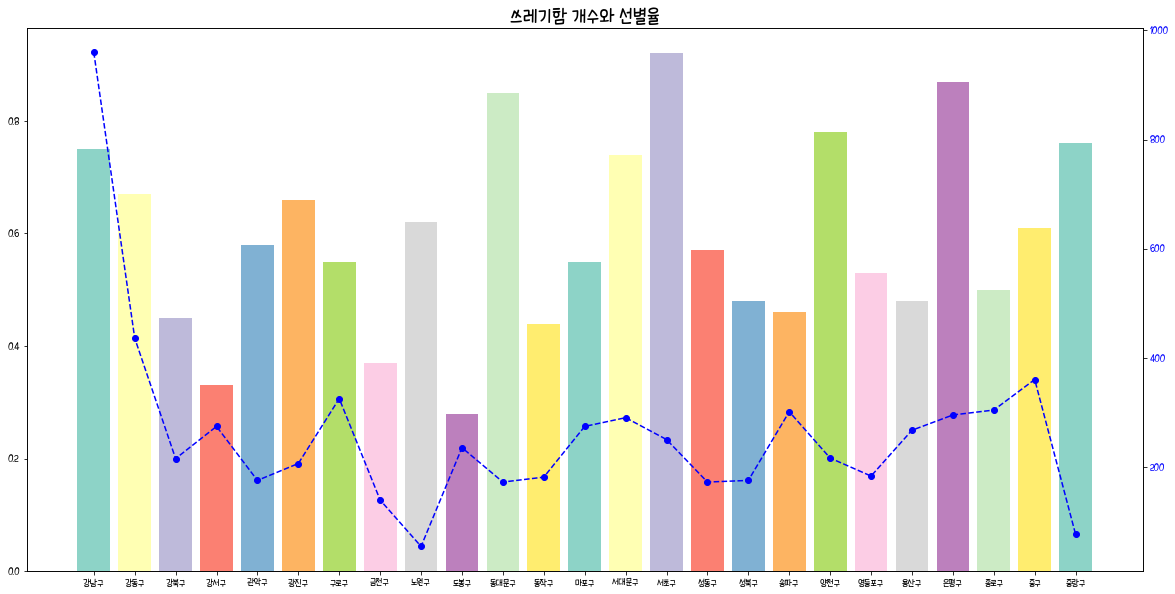

In [120]:

fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white') ## Figure 배경색 지정
ax1 = fig.add_subplot() ## axes 생성
 
colors = sns.color_palette('summer', len(s1.자치구)) ## 바 차트 색상
 
xtick_label_position = list(range(len(s1.자치구))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
ax1.set_xticklabels(s1.자치구) ## x축 눈금 라벨
ax1.bar(xtick_label_position, s1.선별율, color=mycolors) ## 바차트 출력
 
color = 'blue'
ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(xtick_label_position, temp.휴지통,color=color, linestyle='--', marker='o') ## 선 그래프 
ax2.tick_params(axis='y', labelcolor=color) ## 눈금 라벨 색상 지정
 
plt.title('쓰레기함 개수와 선별율', fontsize=20)
plt.savefig('./쓰레기함 개수와 선별율.png')